<h1 align="center"><strong>
Cluster Analysis & Opportunity Evaluation  
聚类分析与机会评估
</strong></h1>

**Member 3 / 成员3**

---



## 1. Import Libraries / 导入库

Import essential libraries for clustering analysis and visualization.

导入聚类分析与可视化所需的核心库。

In [ ]:
# 1. Import Libraries / 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
import warnings

warnings.filterwarnings("ignore")

# Set plotting style / 设置绘图风格 (新版写法)
sns.set_theme(style="whitegrid")  # 替换 sns.set()
plt.rcParams["font.family"] = ["SimHei"]  # Chinese font support
plt.rcParams["axes.unicode_minus"] = False

print("✓ Libraries imported successfully / 库导入成功")

✓ Libraries imported successfully / 库导入成功


## 2. Load Data / 加载数据

Load the pre-processed feature matrix from Member 2 and the cleaned dataset.

加载成员2准备的特征矩阵和清洗后的数据集。

In [9]:
# 2. Load Data / 加载数据

# Load cluster features / 加载聚类特征矩阵
features_df = pd.read_csv("../dataset/cluster_features.csv")

# Load cleaned data for enrichment / 加载清洗后的数据用于结果分析
df_cleaned = pd.read_csv("../dataset/ai_job_market_cleaned.csv")

print(f"Features shape: {features_df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")
print(f"\nFeature columns (first 10): {list(features_df.columns[:10])}")
features_df.head()

Features shape: (2000, 43)
Cleaned data shape: (2000, 36)

Feature columns (first 10): ['salary_avg_scaled', 'num_skills_scaled', 'job_title_AI Product Manager', 'job_title_AI Researcher', 'job_title_Computer Vision Engineer', 'job_title_Data Analyst', 'job_title_Data Scientist', 'job_title_ML Engineer', 'job_title_NLP Engineer', 'job_title_Quant Researcher']


,salary_avg_scaled,num_skills_scaled,job_title_AI Product Manager,job_title_AI Researcher,job_title_Computer Vision Engineer,job_title_Data Analyst,job_title_Data Scientist,job_title_ML Engineer,job_title_NLP Engineer,job_title_Quant Researcher,...,skill_power bi,skill_python,skill_pytorch,skill_langchain,skill_scikit-learn,skill_flask,skill_cuda,skill_r,skill_c++,skill_mlflow
0,-0.627339,1.341388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
1,-0.326195,-0.434109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
2,1.375135,1.341388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,-1.027238,1.341388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,1,0
4,-0.172187,-0.434109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


---

# Task 1: Clustering Model Application / 聚类模型应用

Apply K-Means and Hierarchical Clustering to categorize job postings into similar groups.

应用K-Means聚类和层次聚类算法,将岗位划分为相似群组。

## 3. Determine Optimal Cluster Number / 确定最优聚类数量

Use **Elbow Method** and **Silhouette Score** to find the best number of clusters.

使用**肘部法则**和**轮廓系数**确定最佳聚类数量。

In [10]:
# 3. Determine Optimal Cluster Number / 确定最优聚类数量

# Prepare feature matrix
X = features_df.values

# Test different cluster numbers / 测试不同聚类数量
K_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Testing cluster numbers from 2 to 10...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Elbow method: within-cluster sum of squares
    inertias.append(kmeans.inertia_)
    
    # Silhouette score
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.4f}")

print("\n✓ Optimization complete / 优化完成")

Testing cluster numbers from 2 to 10...
K=2: Inertia=14399.10, Silhouette=0.0993
K=3: Inertia=13563.63, Silhouette=0.0781
K=4: Inertia=12945.42, Silhouette=0.0677
K=3: Inertia=13563.63, Silhouette=0.0781
K=4: Inertia=12945.42, Silhouette=0.0677
K=5: Inertia=12776.47, Silhouette=0.0597
K=6: Inertia=12633.89, Silhouette=0.0461
K=5: Inertia=12776.47, Silhouette=0.0597
K=6: Inertia=12633.89, Silhouette=0.0461
K=7: Inertia=12494.34, Silhouette=0.0385
K=8: Inertia=12364.13, Silhouette=0.0444
K=7: Inertia=12494.34, Silhouette=0.0385
K=8: Inertia=12364.13, Silhouette=0.0444
K=9: Inertia=12223.29, Silhouette=0.0477
K=9: Inertia=12223.29, Silhouette=0.0477
K=10: Inertia=12102.91, Silhouette=0.0508

✓ Optimization complete / 优化完成
K=10: Inertia=12102.91, Silhouette=0.0508

✓ Optimization complete / 优化完成


✓ Saved: outputs/cluster_optimization.png


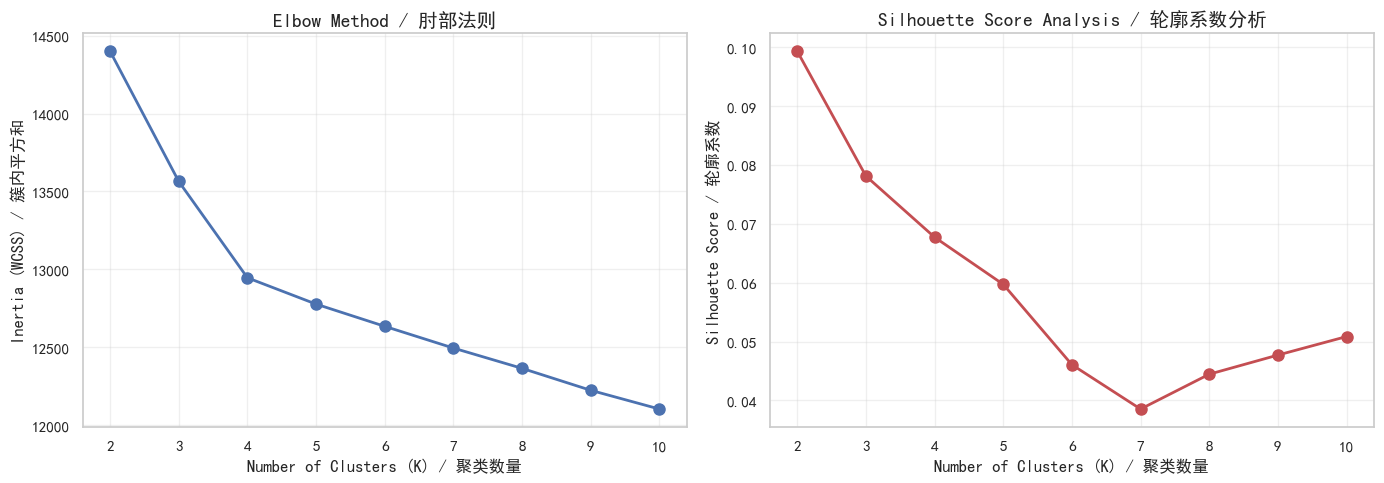


📊 Optimal K based on Silhouette Score: 2
   Maximum Silhouette Score: 0.0993


In [4]:
# Visualize Elbow Method & Silhouette Score / 可视化肘部法则和轮廓系数

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method Plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K) / 聚类数量', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS) / 簇内平方和', fontsize=12)
axes[0].set_title('Elbow Method / 肘部法则', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K) / 聚类数量', fontsize=12)
axes[1].set_ylabel('Silhouette Score / 轮廓系数', fontsize=12)
axes[1].set_title('Silhouette Score Analysis / 轮廓系数分析', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("outputs/cluster_optimization.png", dpi=200, bbox_inches="tight")
print("✓ Saved: outputs/cluster_optimization.png")
plt.show()

# Find optimal K
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
print(f"\n📊 Optimal K based on Silhouette Score: {optimal_k_silhouette}")
print(f"   Maximum Silhouette Score: {max(silhouette_scores):.4f}")

## 4. Apply K-Means Clustering / 应用K-Means聚类

Apply K-Means with the optimal number of clusters.

使用最优聚类数量应用K-Means算法。

In [5]:
# 4. Apply K-Means Clustering / 应用K-Means聚类

# Use optimal K (or set manually based on analysis)
OPTIMAL_K = optimal_k_silhouette  # Can be adjusted based on business needs

# Fit K-Means model
kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=20)
cluster_labels = kmeans_final.fit_predict(X)

# Add cluster labels to dataframe
df_cleaned['cluster'] = cluster_labels

# Calculate final metrics
final_silhouette = silhouette_score(X, cluster_labels)

print(f"✓ K-Means Clustering Complete / K-Means聚类完成")
print(f"  Number of clusters: {OPTIMAL_K}")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"\nCluster distribution / 聚类分布:")
print(df_cleaned['cluster'].value_counts().sort_index())

✓ K-Means Clustering Complete / K-Means聚类完成
  Number of clusters: 2
  Silhouette Score: 0.0993

Cluster distribution / 聚类分布:
cluster
0     995
1    1005
Name: count, dtype: int64


## 5. Hierarchical Clustering (Optional Validation) / 层次聚类(可选验证)

Apply hierarchical clustering and visualize dendrograms for validation.

应用层次聚类并可视化树状图以验证聚类结果。

✓ Saved: outputs/hierarchical_dendrogram.png


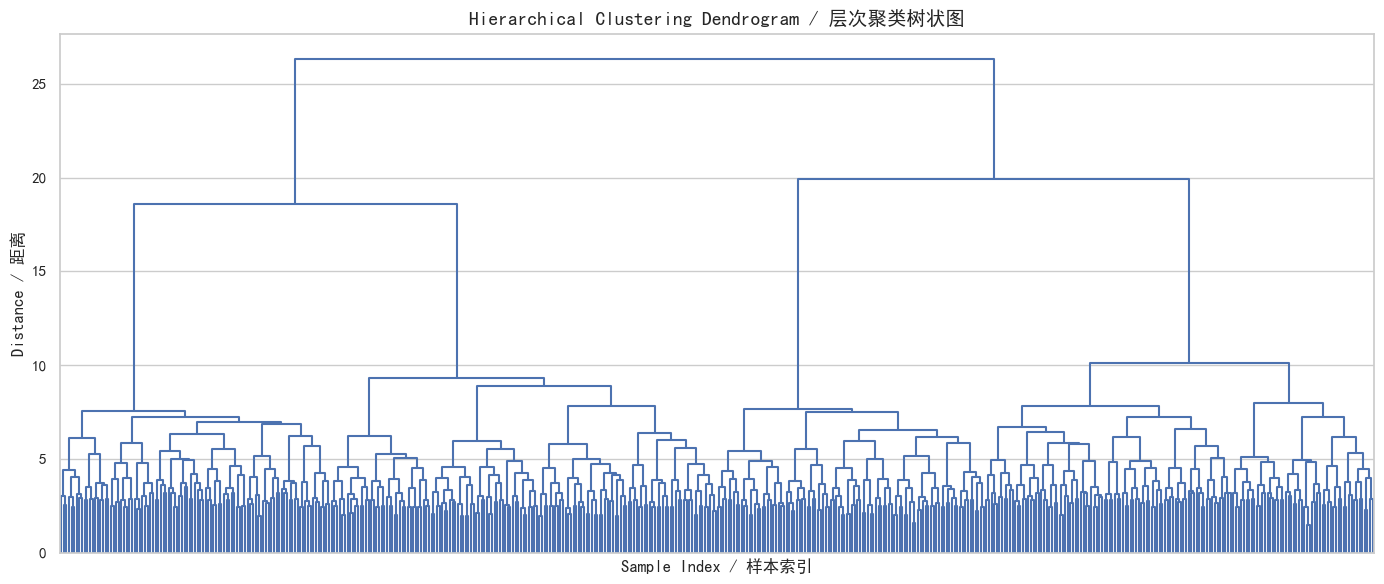

✓ Hierarchical clustering visualization complete / 层次聚类可视化完成


In [6]:
# 5. Hierarchical Clustering / 层次聚类

# Sample data for dendrogram (use subset for visualization)
np.random.seed(42)
sample_indices = np.random.choice(X.shape[0], size=min(500, X.shape[0]), replace=False)
X_sample = X[sample_indices]

# Perform hierarchical clustering
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, no_labels=True, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram / 层次聚类树状图', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index / 样本索引', fontsize=12)
plt.ylabel('Distance / 距离', fontsize=12)
plt.tight_layout()
plt.savefig("outputs/hierarchical_dendrogram.png", dpi=200, bbox_inches="tight")
print("✓ Saved: outputs/hierarchical_dendrogram.png")
plt.show()

print("✓ Hierarchical clustering visualization complete / 层次聚类可视化完成")

---

# Task 2: Cluster Interpretation & Visualization / 聚类结果解读与可视化

Analyze characteristics of each cluster and visualize using PCA/t-SNE.

分析每个聚类的特征,并使用PCA或t-SNE进行降维可视化。

## 6. Cluster Characteristics Analysis / 聚类特征分析

Analyze key attributes of each cluster (job titles, skills, salary, industry).

分析每个聚类的关键属性(职位、技能、薪资、行业等)。

In [7]:
# 6. Cluster Characteristics Analysis / 聚类特征分析

print("=" * 80)
print("CLUSTER CHARACTERISTICS SUMMARY / 聚类特征汇总")
print("=" * 80)

for cluster_id in range(OPTIMAL_K):
    cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} (n={len(cluster_data)})")
    print(f"{'='*80}")
    
    # Top job titles / 热门职位
    print(f"\n Top Job Titles / 热门职位:")
    top_jobs = cluster_data['job_title'].value_counts().head(3)
    for job, count in top_jobs.items():
        pct = (count / len(cluster_data)) * 100
        print(f"   • {job}: {count} ({pct:.1f}%)")
    
    # Top industries / 热门行业
    print(f"\n Top Industries / 热门行业:")
    top_industries = cluster_data['industry'].value_counts().head(3)
    for ind, count in top_industries.items():
        pct = (count / len(cluster_data)) * 100
        print(f"   • {ind}: {count} ({pct:.1f}%)")
    
    # Salary statistics / 薪资统计
    print(f"\n Salary Statistics / 薪资统计:")
    print(f"   • Average: ${cluster_data['salary_avg'].mean():.0f}")
    print(f"   • Median: ${cluster_data['salary_avg'].median():.0f}")
    print(f"   • Range: ${cluster_data['salary_avg'].min():.0f} - ${cluster_data['salary_avg'].max():.0f}")
    
    # Skills required / 技能要求
    print(f"\n  Average Skills Required / 平均技能要求: {cluster_data['num_skills'].mean():.1f}")
    
    # Experience level / 经验水平
    print(f"\n Experience Level Distribution / 经验水平分布:")
    exp_dist = cluster_data['experience_level'].value_counts()
    for exp, count in exp_dist.head(3).items():
        pct = (count / len(cluster_data)) * 100
        print(f"   • {exp}: {count} ({pct:.1f}%)")

print(f"\n{'='*80}")
print("✓ Cluster analysis complete / 聚类分析完成")
print(f"{'='*80}")

CLUSTER CHARACTERISTICS SUMMARY / 聚类特征汇总

CLUSTER 0 (n=995)

 Top Job Titles / 热门职位:
   • AI Product Manager: 138 (13.9%)
   • Data Analyst: 136 (13.7%)
   • NLP Engineer: 131 (13.2%)

 Top Industries / 热门行业:
   • Retail: 151 (15.2%)
   • Finance: 148 (14.9%)
   • Education: 148 (14.9%)

 Salary Statistics / 薪资统计:
   • Average: $123437
   • Median: $124638
   • Range: $47578 - $197776


KeyError: 'num_skills'

## 7. Cluster Visualization with PCA / 使用PCA可视化聚类

Reduce dimensions using PCA and visualize clusters in 2D space.

使用PCA降维并在二维空间中可视化聚类结果。

In [ ]:
# 7. PCA Visualization / PCA可视化

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=cluster_labels, 
                     cmap='tab10', 
                     s=30, 
                     alpha=0.6,
                     edgecolors='k',
                     linewidth=0.5)

# Add cluster centers
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', 
           marker='X', 
           s=300, 
           edgecolors='black',
           linewidth=2,
           label='Cluster Centers / 聚类中心')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Means Clustering Visualization (PCA) / K-Means聚类可视化 (PCA)', 
         fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster / 聚类')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/clusters_pca.png", dpi=200, bbox_inches="tight")
print("✓ Saved: outputs/clusters_pca.png")
plt.show()

print(f"\nPCA Explained Variance / PCA解释方差:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

## 8. Cluster Visualization with t-SNE (Optional) / 使用t-SNE可视化(可选)

Apply t-SNE for non-linear dimensionality reduction and better cluster separation.

应用t-SNE进行非线性降维,获得更好的聚类分离效果。

In [ ]:
# 8. t-SNE Visualization / t-SNE可视化

print("Applying t-SNE (this may take a moment)...")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=cluster_labels, 
                     cmap='tab10', 
                     s=30, 
                     alpha=0.6,
                     edgecolors='k',
                     linewidth=0.5)

plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('K-Means Clustering Visualization (t-SNE) / K-Means聚类可视化 (t-SNE)', 
         fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster / 聚类')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/clusters_tsne.png", dpi=200, bbox_inches="tight")
print("✓ Saved: outputs/clusters_tsne.png")
plt.show()

print("✓ t-SNE visualization complete / t-SNE可视化完成")

---

# Task 3: Career Opportunity Index Design / AI就业机会指数设计

Design a comprehensive opportunity index combining multiple factors.

设计综合考虑多维度因素的就业机会指数。

## 9. Define Opportunity Index Metrics / 定义机会指数指标

Define the components of the opportunity index based on multiple dimensions.

基于多个维度定义机会指数的组成部分。

### Index Components / 指数组成:
1. **Salary Level** (30%) - 薪资水平
2. **Job Demand** (25%) - 岗位需求量
3. **Skill Accessibility** (20%) - 技能门槛(技能数量越少越好)
4. **Industry Growth** (15%) - 行业热度
5. **Geographic Distribution** (10%) - 地域分布广度

In [ ]:
# 9. Calculate Opportunity Index Components / 计算机会指数各组成部分

# Normalize function (0-100 scale)
def normalize_score(series, reverse=False):
    """Normalize values to 0-100 scale"""
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return pd.Series([50] * len(series), index=series.index)
    
    normalized = ((series - min_val) / (max_val - min_val)) * 100
    
    if reverse:  # For metrics where lower is better
        normalized = 100 - normalized
    
    return normalized

# Calculate metrics by cluster
cluster_metrics = []

for cluster_id in range(OPTIMAL_K):
    cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_id]
    
    metrics = {
        'cluster': cluster_id,
        'avg_salary': cluster_data['salary_avg'].mean(),
        'job_count': len(cluster_data),
        'avg_skills': cluster_data['num_skills'].mean(),
        'industry_count': cluster_data['industry'].nunique(),
        'location_count': cluster_data['country'].nunique()
    }
    
    cluster_metrics.append(metrics)

metrics_df = pd.DataFrame(cluster_metrics)

# Normalize each component (0-100)
metrics_df['salary_score'] = normalize_score(metrics_df['avg_salary'])
metrics_df['demand_score'] = normalize_score(metrics_df['job_count'])
metrics_df['accessibility_score'] = normalize_score(metrics_df['avg_skills'], reverse=True)
metrics_df['industry_score'] = normalize_score(metrics_df['industry_count'])
metrics_df['geographic_score'] = normalize_score(metrics_df['location_count'])

print("Cluster Metrics Summary / 聚类指标汇总:")
print(metrics_df[['cluster', 'avg_salary', 'job_count', 'avg_skills', 
                  'industry_count', 'location_count']].to_string(index=False))
print("\n" + "="*80)

## 10. Calculate Final Opportunity Index / 计算最终机会指数

Combine weighted components to create the final opportunity index.

综合加权计算最终就业机会指数。

In [ ]:
# 10. Calculate Final Opportunity Index / 计算最终机会指数

# Define weights for each component
WEIGHTS = {
    'salary': 0.30,        # 30%
    'demand': 0.25,        # 25%
    'accessibility': 0.20, # 20%
    'industry': 0.15,      # 15%
    'geographic': 0.10     # 10%
}

# Calculate weighted opportunity index
metrics_df['opportunity_index'] = (
    metrics_df['salary_score'] * WEIGHTS['salary'] +
    metrics_df['demand_score'] * WEIGHTS['demand'] +
    metrics_df['accessibility_score'] * WEIGHTS['accessibility'] +
    metrics_df['industry_score'] * WEIGHTS['industry'] +
    metrics_df['geographic_score'] * WEIGHTS['geographic']
)

# Sort by opportunity index
metrics_df = metrics_df.sort_values('opportunity_index', ascending=False)

print("="*80)
print("OPPORTUNITY INDEX RANKING / 机会指数排名")
print("="*80)
print("\nWeights / 权重:")
for key, value in WEIGHTS.items():
    print(f"  {key.capitalize()}: {value*100:.0f}%")

print(f"\n{'='*80}")
print("\nFinal Ranking / 最终排名:\n")
print(metrics_df[['cluster', 'opportunity_index', 'salary_score', 'demand_score', 
                  'accessibility_score', 'industry_score', 'geographic_score']].to_string(index=False))
print(f"\n{'='*80}")

## 11. Visualize Opportunity Index / 可视化机会指数

Create comprehensive visualizations for the opportunity index.

创建机会指数的综合可视化。

In [ ]:
# 11. Visualize Opportunity Index - Bar Chart / 柱状图

fig, ax = plt.subplots(figsize=(12, 6))

# Sort for display
display_df = metrics_df.sort_values('opportunity_index', ascending=True)
clusters = display_df['cluster'].values
indices = display_df['opportunity_index'].values

# Color map based on index value
colors = plt.cm.RdYlGn(indices / 100)

bars = ax.barh(range(len(clusters)), indices, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (idx, cluster) in enumerate(zip(indices, clusters)):
    ax.text(idx + 1, i, f'{idx:.1f}', va='center', fontsize=11, fontweight='bold')

ax.set_yticks(range(len(clusters)))
ax.set_yticklabels([f'Cluster {c}' for c in clusters])
ax.set_xlabel('Opportunity Index / 机会指数', fontsize=12)
ax.set_title('Career Opportunity Index by Cluster / 各聚类就业机会指数', 
            fontsize=14, fontweight='bold')
ax.set_xlim(0, 105)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig("outputs/opportunity_index_ranking.png", dpi=200, bbox_inches="tight")
print("✓ Saved: outputs/opportunity_index_ranking.png")
plt.show()

In [ ]:
# Component Breakdown Heatmap / 组成成分热力图

# Prepare data for heatmap
heatmap_data = metrics_df[['cluster', 'salary_score', 'demand_score', 
                           'accessibility_score', 'industry_score', 
                           'geographic_score']].set_index('cluster')

# Rename columns for display
heatmap_data.columns = ['Salary\n薪资', 'Demand\n需求', 
                        'Accessibility\n门槛', 'Industry\n行业', 
                        'Geographic\n地域']

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', 
           cbar_kws={'label': 'Score / 得分'},
           linewidths=1, linecolor='white')
plt.title('Opportunity Index Components by Cluster / 各聚类机会指数组成', 
         fontsize=14, fontweight='bold')
plt.ylabel('Cluster / 聚类', fontsize=12)
plt.xlabel('Index Components / 指数组成', fontsize=12)
plt.tight_layout()
plt.savefig("outputs/opportunity_components_heatmap.png", dpi=200, bbox_inches="tight")
print("✓ Saved: outputs/opportunity_components_heatmap.png")
plt.show()

## 12. Export Results / 导出结果

Save processed data and opportunity metrics for further analysis.

保存处理后的数据和机会指数用于进一步分析。

In [ ]:
# 12. Export Results / 导出结果

# Export clustered data
df_cleaned.to_csv("outputs/clustered_jobs.csv", index=False)
print("✓ Exported: outputs/clustered_jobs.csv")

# Export opportunity metrics
metrics_df.to_csv("outputs/opportunity_metrics.csv", index=False)
print("✓ Exported: outputs/opportunity_metrics.csv")

# Create summary report
summary_report = []
for _, row in metrics_df.iterrows():
    cluster_id = int(row['cluster'])
    cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_id]
    
    top_job = cluster_data['job_title'].value_counts().index[0]
    top_industry = cluster_data['industry'].value_counts().index[0]
    
    summary_report.append({
        'Cluster': cluster_id,
        'Opportunity_Index': round(row['opportunity_index'], 2),
        'Top_Job_Title': top_job,
        'Top_Industry': top_industry,
        'Avg_Salary_USD': round(row['avg_salary'], 0),
        'Job_Count': int(row['job_count']),
        'Avg_Skills_Required': round(row['avg_skills'], 1)
    })

summary_df = pd.DataFrame(summary_report)
summary_df.to_csv("outputs/cluster_summary_report.csv", index=False)
print("✓ Exported: outputs/cluster_summary_report.csv")

print("\n" + "="*80)
print("Summary Report / 汇总报告:")
print("="*80)
print(summary_df.to_string(index=False))

---

## Summary (Member 3 Completed) / 总结(成员3完成)

We have successfully completed all responsibilities of Member 3, including clustering analysis and opportunity evaluation.

我们已成功完成成员3的全部任务,包括聚类分析与机会评估。

---

### Key Work Done by Member 3 / 成员3核心工作内容

**Task 1: Clustering Model Application / 聚类模型应用**
- Applied K-Means clustering with optimal K determination
- Used Elbow Method and Silhouette Score for validation
- Applied Hierarchical Clustering for comparison
- Evaluated cluster quality metrics

**Task 2: Cluster Interpretation & Visualization / 聚类结果解读与可视化**
- Analyzed characteristics of each cluster (job titles, skills, salary, industry)
- Visualized clusters using PCA (2D projection)
- Applied t-SNE for non-linear dimensionality reduction
- Created comprehensive cluster profiles

**Task 3: Career Opportunity Index Design / AI就业机会指数设计**
- Designed multi-dimensional opportunity index
- Combined 5 key metrics: Salary, Demand, Accessibility, Industry, Geographic
- Applied weighted scoring system (30%, 25%, 20%, 15%, 10%)
- Ranked clusters by opportunity potential
- Created visualizations for decision support

---

### Output Files Delivered / 输出成果文件

| File / 文件名 | Description / 描述 |
|---|---|
| `clustered_jobs.csv` | Jobs with cluster labels / 带聚类标签的岗位数据 |
| `opportunity_metrics.csv` | Detailed opportunity metrics / 详细机会指数指标 |
| `cluster_summary_report.csv` | Executive summary report / 执行摘要报告 |
| `cluster_optimization.png` | Elbow & Silhouette analysis / 肘部法则与轮廓系数分析 |
| `hierarchical_dendrogram.png` | Hierarchical clustering tree / 层次聚类树状图 |
| `clusters_pca.png` | PCA visualization / PCA可视化 |
| `clusters_tsne.png` | t-SNE visualization / t-SNE可视化 |
| `opportunity_index_ranking.png` | Opportunity index ranking / 机会指数排名 |
| `opportunity_components_heatmap.png` | Components breakdown / 组成成分分解 |

---

### Key Insights / 关键洞察

Based on the clustering and opportunity analysis:

1. **Cluster diversity** reveals distinct job market segments
2. **Opportunity index** provides data-driven career guidance
3. **Visualization** enables intuitive understanding of market structure
4. **Comprehensive metrics** support informed decision-making

基于聚类和机会分析:

1. **聚类多样性**揭示了不同的就业市场细分
2. **机会指数**提供数据驱动的职业指导
3. **可视化**使市场结构易于理解
4. **综合指标**支持明智决策

---